In [1]:
import numpy as np
from pandas import DataFrame
from numpy import array, dot, sum, transpose

from matplotlib import pyplot as plt
%matplotlib inline

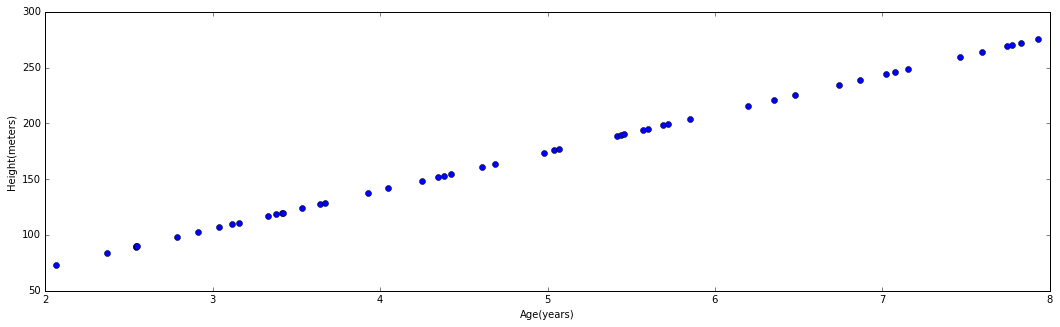

In [75]:
x = np.array(list(map(float, open('ex2x.dat').read().split())))
y = np.array(list(map(float, open('ex2y.dat').read().split())))


# redefining it so that I may knw what I am getting
y = 34.5 * x + 2 # * np.random.random(len(x))

plt.figure(figsize=(18, 5))
plt.plot(x, y, 'o')
plt.xlabel('Age(years)')
plt.ylabel('Height(meters)')

In [76]:
M = 50 # 50 points na - same as len(x)

x = np.array([(_, 1) for _ in x])

y.shape = (50, 1)

theta = np.ones((2, 1))

theta_bag = []

y.shape, x.shape, theta.shape

scores = []

learning_rate = 0.005

iterations = 51

for i in range(iterations):
    Y_predicted = np.dot(x, theta)
    pred_errs = (Y_predicted - y).T
    theta = theta - ((1/M) * dot(pred_errs, x).T) * learning_rate
    score = np.mean(np.sqrt(pred_errs ** 2))
    scores.append(score)
    theta_bag.append(theta.copy())
    if i % (iterations/10) == 0:        
        print('Iter:', i, '\t Error:', score, theta)
        

Iter: 0 	 Error: 165.939661062 [[ 5.57493871]
 [ 1.82969831]]


In [77]:
theta

array([[ 33.61167014],
       [  6.79963739]])

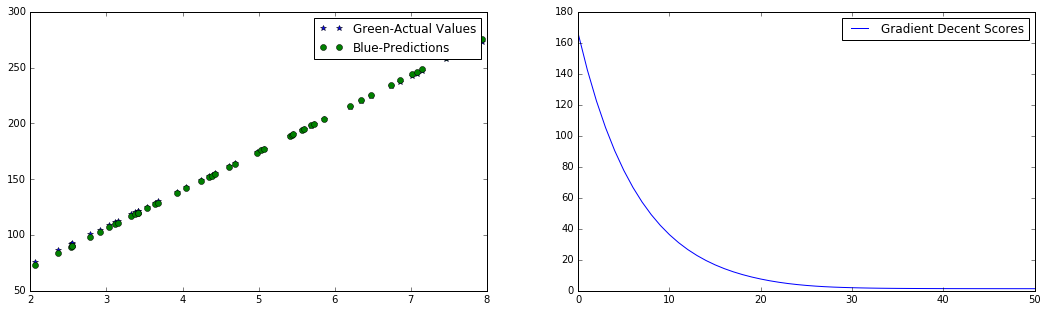

In [78]:
plt.figure(figsize=(18, 5))

ax1, ax2 = plt.subplot(1, 2, 1), plt.subplot(1, 2, 2)

ax1.plot(x[:, 0], Y_predicted.ravel(), '*', )
ax1.plot(x[:, 0], y, 'o', )
ax1.legend(['Green-Actual Values', 'Blue-Predictions'])

ax2.plot(range(len(scores)), scores)
ax2.legend(['Gradient Decent Scores'])

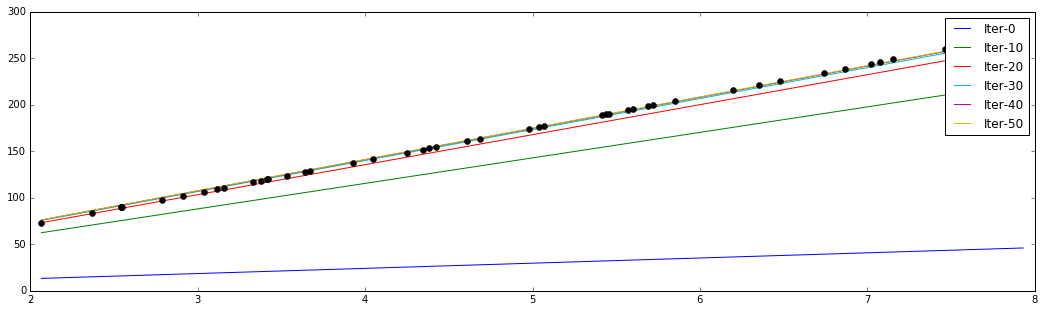

In [91]:
plt.figure(figsize=(18, 5))

names = []

for i, _ in enumerate(theta_bag[::10]):
    Y_predicted = np.dot(x, _)
    plt.plot(x[:, 0], Y_predicted.ravel())
    names.append('Iter-' + str(i * 10 ))

plt.legend(names)
plt.plot(x[:, 0], y, 'o', )